In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Styling
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_excel("C:\\Users\\Happyy\\OneDrive\\Documents\\MA\\Internship\\train(data).xlsx")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Overview
df.info()

# Summary statistics
df.describe(include='all')

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

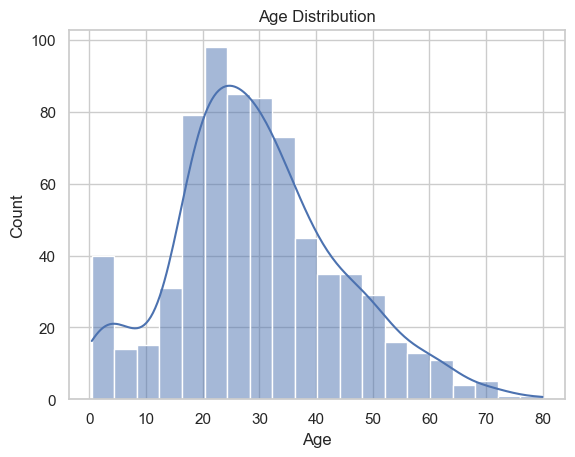

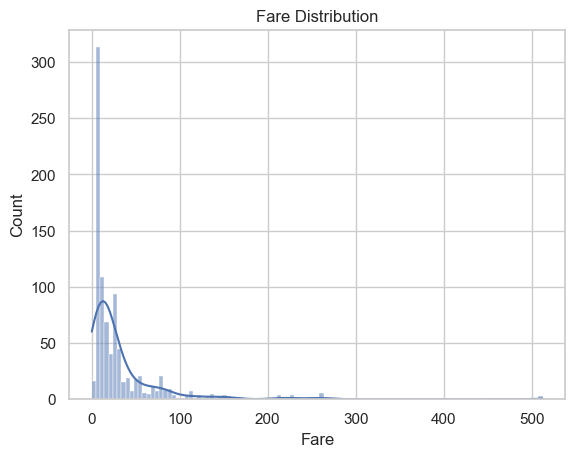

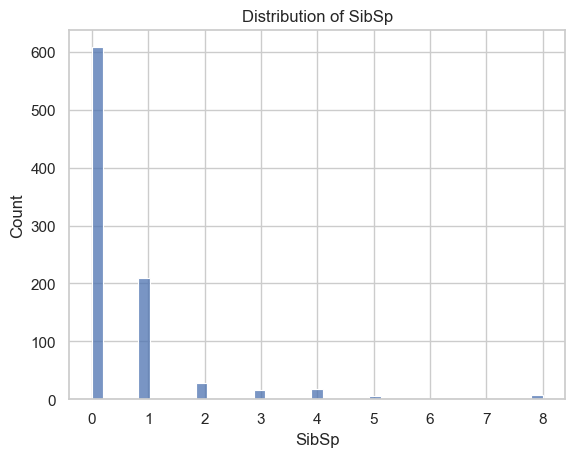

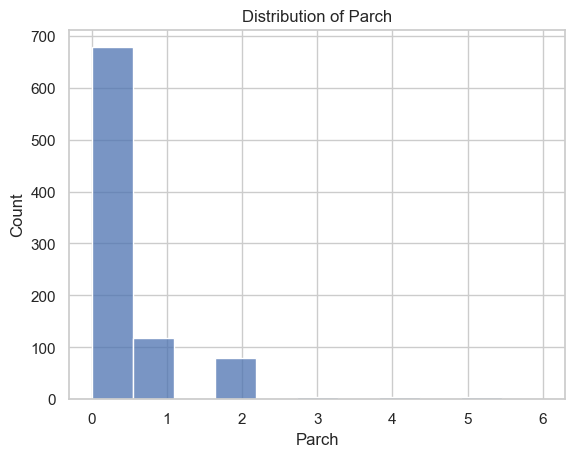

In [11]:
# Age distribution
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

# SibSp and Parch
for col in ['SibSp', 'Parch']:
    sns.histplot(df[col], kde=False)
    plt.title(f"Distribution of {col}")
    plt.show()


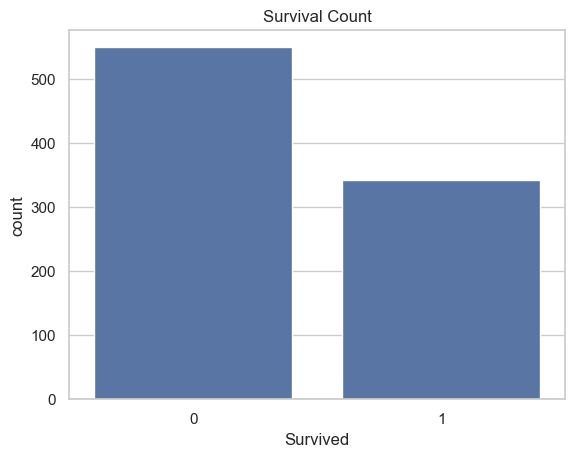

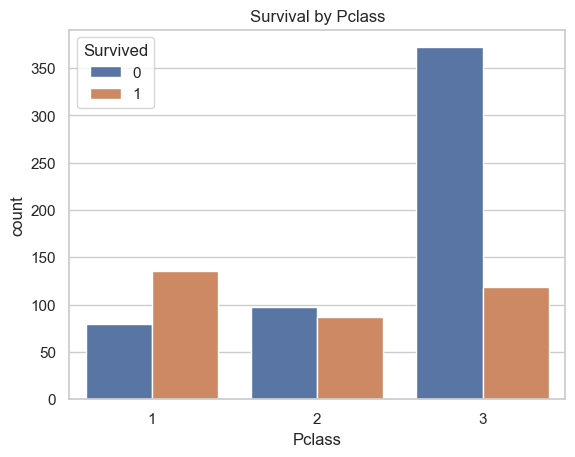

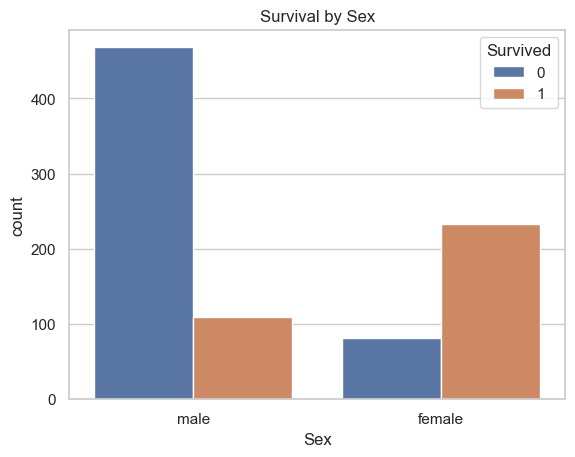

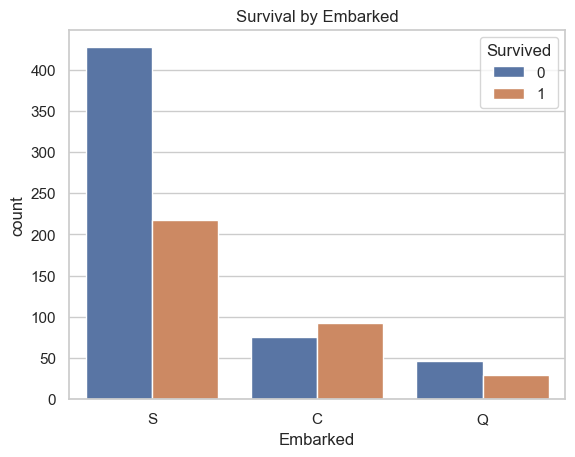

In [12]:
# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Pclass, Sex, Embarked vs Survival
for col in ['Pclass', 'Sex', 'Embarked']:
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f"Survival by {col}")
    plt.show()


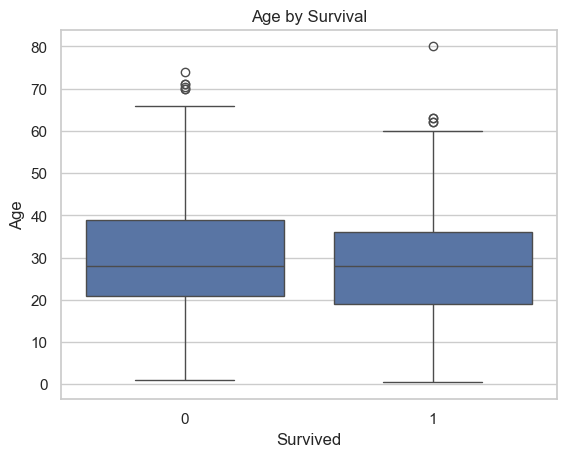

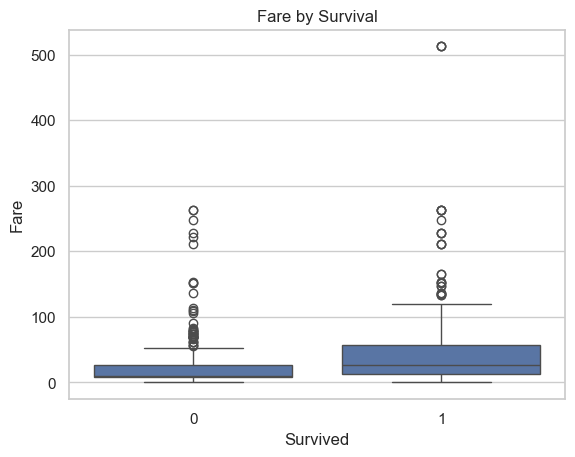

In [13]:
# Boxplots of Age and Fare by Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age by Survival")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival")
plt.show()


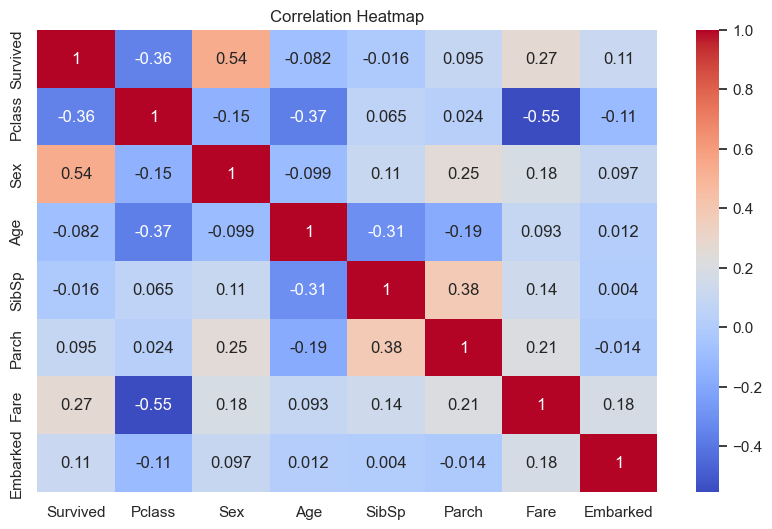

In [14]:
# Encode categorical variables for correlation
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_corr = df_corr.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

# Drop NaNs
df_corr = df_corr.dropna()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


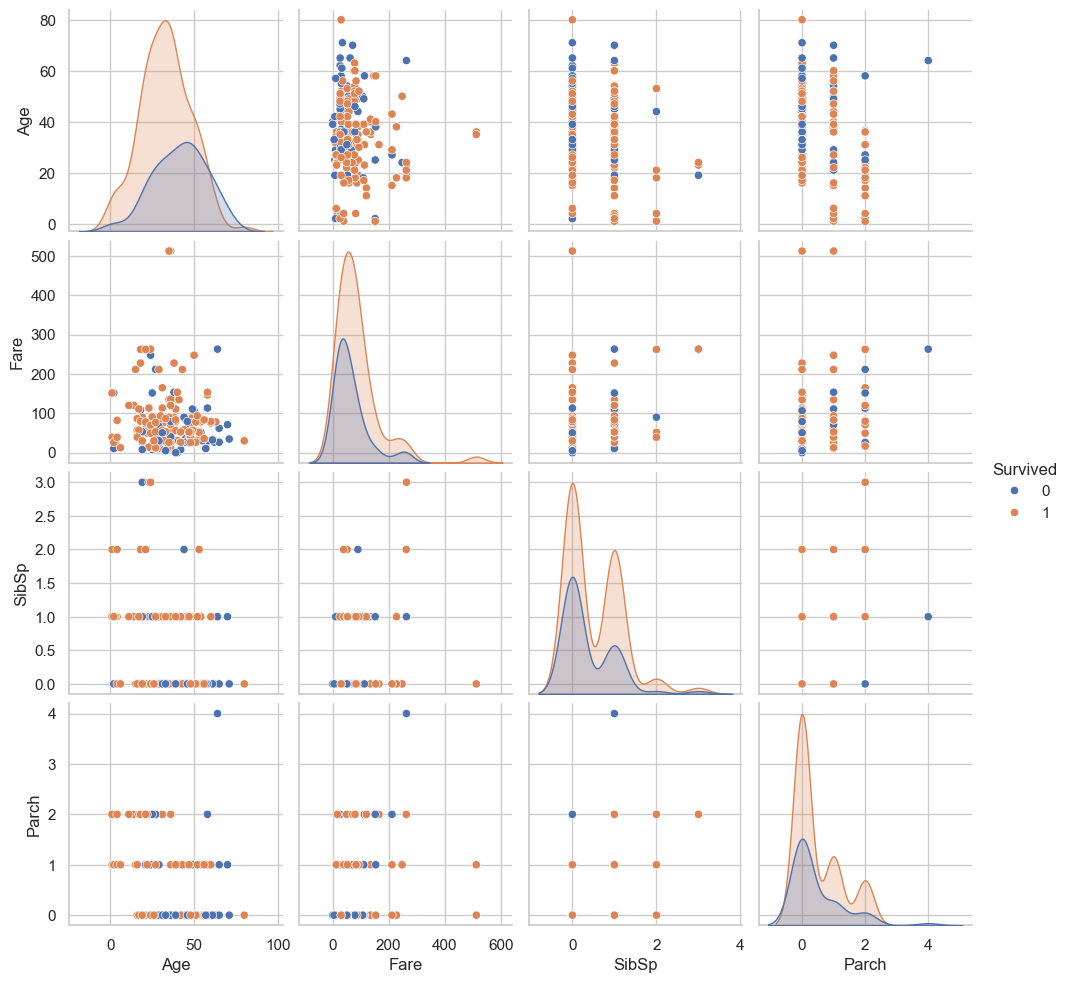

In [16]:
sns.pairplot(df.dropna(), hue='Survived', vars=['Age', 'Fare', 'SibSp', 'Parch'])
plt.show()
